In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


## Load Data

In [37]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [38]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [40]:
train_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

## Preprocessing

**Right now just filling missing values as a basic step of preprocessing.**

**Might change or add different preprocessing techniques once we get a base score.**

In [41]:
# train_data.fillna('', inplace=True)
# test_data.fillna('', inplace=True)


**Lets try different things**

In [42]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/atharvagurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/atharvagurav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

In [44]:
# Function to clean the text
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join words back to a single string


In [45]:
# Apply normalization to text columns
train_data['text'] = train_data['text'].apply(normalize_text)
test_data['text'] = test_data['text'].apply(normalize_text)


In [46]:
# save the processed datasets back to csv files
train_data.to_csv('train_normalized.csv', index=False)
test_data.to_csv('test_normalized.csv', index=False)

## Feature Engineering
### Using CountVectorizer to convert text data to numerical data

In [47]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['target']
X_test = vectorizer.transform(test_data['text'])


## Model Training

**Going ahead with LogisticRegression() for now to get the base score.**

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Prediction

In [49]:
predictions = model.predict(X_test)


In [68]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

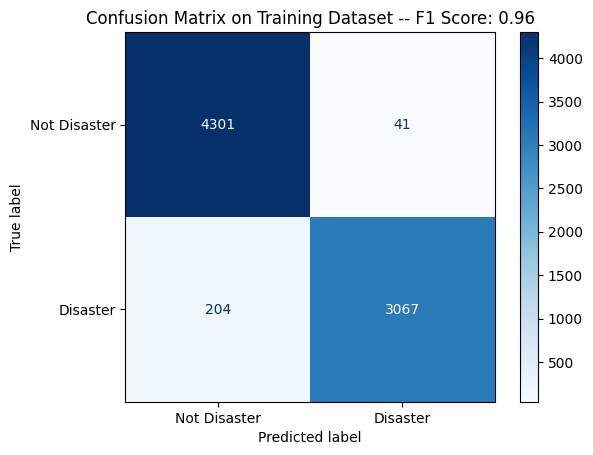

In [69]:
y_pred_train = model.predict(X_train)
displayConfusionMatrix(y_train, y_pred_train, "Training")


## Submission CSV

In [50]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions
})


In [51]:
submission.to_csv('submission3.csv', index=False)